## Первичный анализ датасета

#### Все нужные import

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

#### Инициализация датасета

In [12]:
df = pd.read_csv("../datasets/z_dataset.csv")

#### Круговая диаграмма

                     Количество
http_url_categories            
нет                        1269
информационный сайт          60
студент                      24
видеохостинг                 17


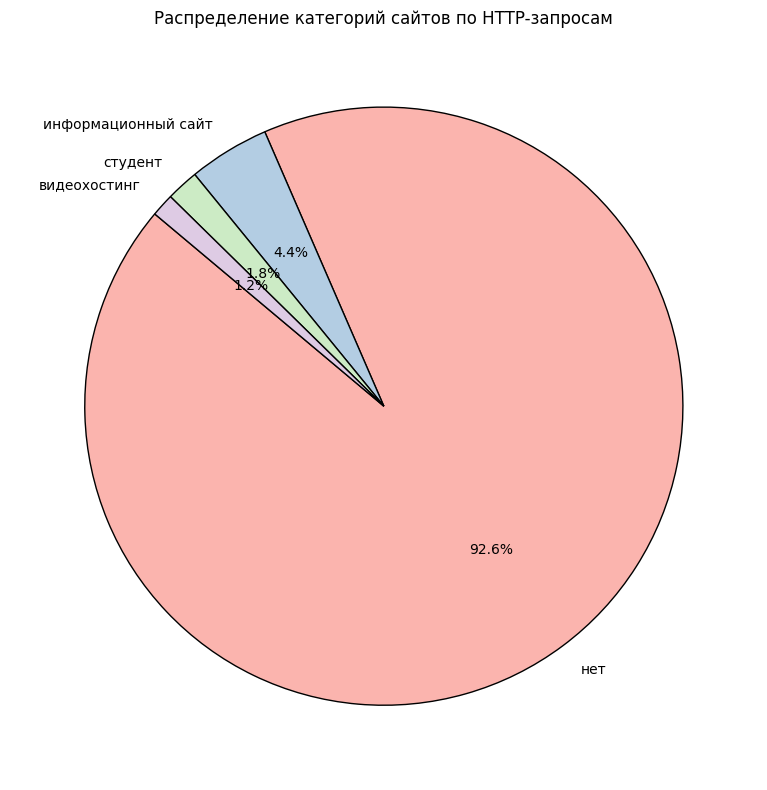

In [13]:
if 'http_url_categories' not in df.columns:
    raise ValueError("Столбец 'http_url_categories' не найден в таблице.")

category_counts = df['http_url_categories'].value_counts()

print(category_counts.to_frame(name='Количество'))

plt.figure(figsize=(8, 8))
category_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors,
    wedgeprops=dict(edgecolor='black')
)

plt.title("Распределение категорий сайтов по HTTP-запросам")
plt.ylabel("")
plt.tight_layout()
plt.savefig("../img/z_url_categories_pie_chart.png")
plt.show()


## Классификация данных

#### Создание столбцов Label_y Label_x

In [14]:
Label_y = df['http_url_categories']
Label_x = df.drop(columns=['time_window_start', 'http_url_categories'])

print("Первые строки целевого столбца:")
print(Label_y.head())

print("\nПервые строки признаков:")
# print(Label_x.head())
pd.DataFrame(Label_x, columns=Label_x.columns).head()

Первые строки целевого столбца:
0    нет
1    нет
2    нет
3    нет
4    нет
Name: http_url_categories, dtype: object

Первые строки признаков:


,tcp_packet_count,udp_packet_count,http_packet_count,tcp_sessions_count,udp_sessions_count,tcp_src_ports_count,udp_src_ports_count,tcp_dst_ports_count,udp_dst_ports_count,avg_pkt_length,avg_tcp_pkt_length,avg_udp_pkt_length,unique_ip_count,http_url_count,avg_http_url_length
0,8,9,0,2,2,2,2,2,2,103,103,103,3,0,0
1,21,27,0,7,7,6,4,5,3,335,407,299,8,0,0
2,54,15,0,11,8,8,6,5,6,434,413,512,8,4,18
3,45,18,0,18,8,14,5,6,7,452,522,276,10,0,0
4,11,6,0,6,2,6,2,2,2,998,1113,787,4,0,0


#### Обработка данных для классификаторов

In [15]:
le = LabelEncoder()
Label_y_encoded = le.fit_transform(Label_y)

scaler = StandardScaler()
Label_x_scaled = scaler.fit_transform(Label_x)

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nКодировка категорий (Label_y):")
print(label_mapping)

print("\nПервые строки масштабированных признаков:")
pd.DataFrame(Label_x_scaled, columns=Label_x.columns).head()


Кодировка категорий (Label_y):
{'видеохостинг': 0, 'информационный сайт': 1, 'нет': 2, 'студент': 3}

Первые строки масштабированных признаков:


,tcp_packet_count,udp_packet_count,http_packet_count,tcp_sessions_count,udp_sessions_count,tcp_src_ports_count,udp_src_ports_count,tcp_dst_ports_count,udp_dst_ports_count,avg_pkt_length,avg_tcp_pkt_length,avg_udp_pkt_length,unique_ip_count,http_url_count,avg_http_url_length
0,-0.377380,-0.327246,-0.10404,-0.650746,-0.634283,-0.712099,-0.815658,-0.620739,-0.632483,-1.264870,-1.010348,-0.977674,-1.000200,-0.377101,-0.552585
1,-0.363481,-0.075267,-0.10404,-0.323606,0.000927,-0.227040,-0.262875,-0.242105,-0.416613,-0.434410,-0.182465,-0.103267,-0.194914,-0.377101,-0.552585
2,-0.328197,-0.243253,-0.10404,-0.061894,0.127969,0.015490,0.289909,-0.242105,0.230996,-0.080033,-0.166125,0.846982,-0.194914,0.185675,1.570292
3,-0.337820,-0.201257,-0.10404,0.396102,0.127969,0.743079,0.013517,-0.115893,0.446866,-0.015601,0.130714,-0.205876,0.127200,-0.377101,-0.552585
4,-0.374173,-0.369243,-0.10404,-0.389034,-0.634283,-0.227040,-0.815658,-0.620739,-0.632483,1.938842,1.740185,2.073829,-0.839143,-0.377101,-0.552585


#### Разделение на обучающую и тестовую выборки

Пропорция: Вариант 9 (3:4)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    Label_x_scaled,
    Label_y_encoded,
    test_size=4/7,
    random_state=42,  # Для воспроизводимости
    stratify=Label_y_encoded  # Стратифицированное разделение (сохраняет распределение классов)
)

print("\nРазмер обучающей выборки:", x_train.shape[0])
print("Размер тестовой выборки:", x_test.shape[0])



Размер обучающей выборки: 587
Размер тестовой выборки: 783


#### Обучение классификаторов

In [17]:
results = {}

for depth in [2, 5]:
    gbc = GradientBoostingClassifier(max_depth=depth, random_state=42)
    gbc.fit(x_train, y_train)
    y_pred = gbc.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[f"GradientBoosting (depth={depth})"] = acc

for depth in [2, 5]:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[f"RandomForest (depth={depth})"] = acc

print("\nРезультаты классификации:")
for model_name, acc in results.items():
    print(f"{model_name}: точность = {acc:.4f}")



Результаты классификации:
GradientBoosting (depth=2): точность = 0.9106
GradientBoosting (depth=5): точность = 0.9132
RandomForest (depth=2): точность = 0.9259
RandomForest (depth=5): точность = 0.9195


#### Получение метрик оценок эффективности классификации

In [18]:
print("\nПодробные метрики классификации:\n")

for depth in [2, 5]:
    for model_type, Model in [
        ("GradientBoosting", GradientBoostingClassifier),
        ("RandomForest", RandomForestClassifier)
    ]:
        clf = Model(max_depth=depth, random_state=42)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        print(f"=== {model_type} (depth={depth}) ===")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred, average="weighted", zero_division=0))
        print("Recall:", recall_score(y_test, y_pred, average="weighted"))
        print("F1 Score:", f1_score(y_test, y_pred, average="weighted"))
        
        # ROC-AUC можно посчитать только при бинарной классификации или в режиме "ovr"
        try:
            y_proba = clf.predict_proba(x_test)
            roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="weighted")
            print("ROC-AUC:", roc_auc)
        except:
            print("ROC-AUC: невозможно вычислить")
        
        print()



Подробные метрики классификации:

=== GradientBoosting (depth=2) ===
Accuracy: 0.9106002554278416
Precision: 0.8947177254472205
Recall: 0.9106002554278416
F1 Score: 0.9002147171102756
ROC-AUC: 0.9139716275508194

=== RandomForest (depth=2) ===
Accuracy: 0.9259259259259259
Precision: 0.8573388203017833
Recall: 0.9259259259259259
F1 Score: 0.8903133903133903
ROC-AUC: 0.9229194028237061

=== GradientBoosting (depth=5) ===
Accuracy: 0.913154533844189
Precision: 0.8974391652901795
Recall: 0.913154533844189
F1 Score: 0.9037493536148813
ROC-AUC: 0.9008317952252762

=== RandomForest (depth=5) ===
Accuracy: 0.9195402298850575
Precision: 0.8832130832130832
Recall: 0.9195402298850575
F1 Score: 0.8951913046630394
ROC-AUC: 0.9197587095478973



### Выводы

1) GradientBoosting с depth=5 показал наилучший баланс метрик F1 Score, Precision и Recall.

2) RandomForest с depth=2 имеет лучшую Accuracy, но хуже Precision, что может означать больше ложноположительных классификаций.

3) Повышение глубины (с 2 до 5) немного улучшает F1 и Recall, но не всегда — иногда Accuracy падает.

4) ROC-AUC для всех моделей > 0.9, что говорит о хорошем разделении классов.

#### Визуализация

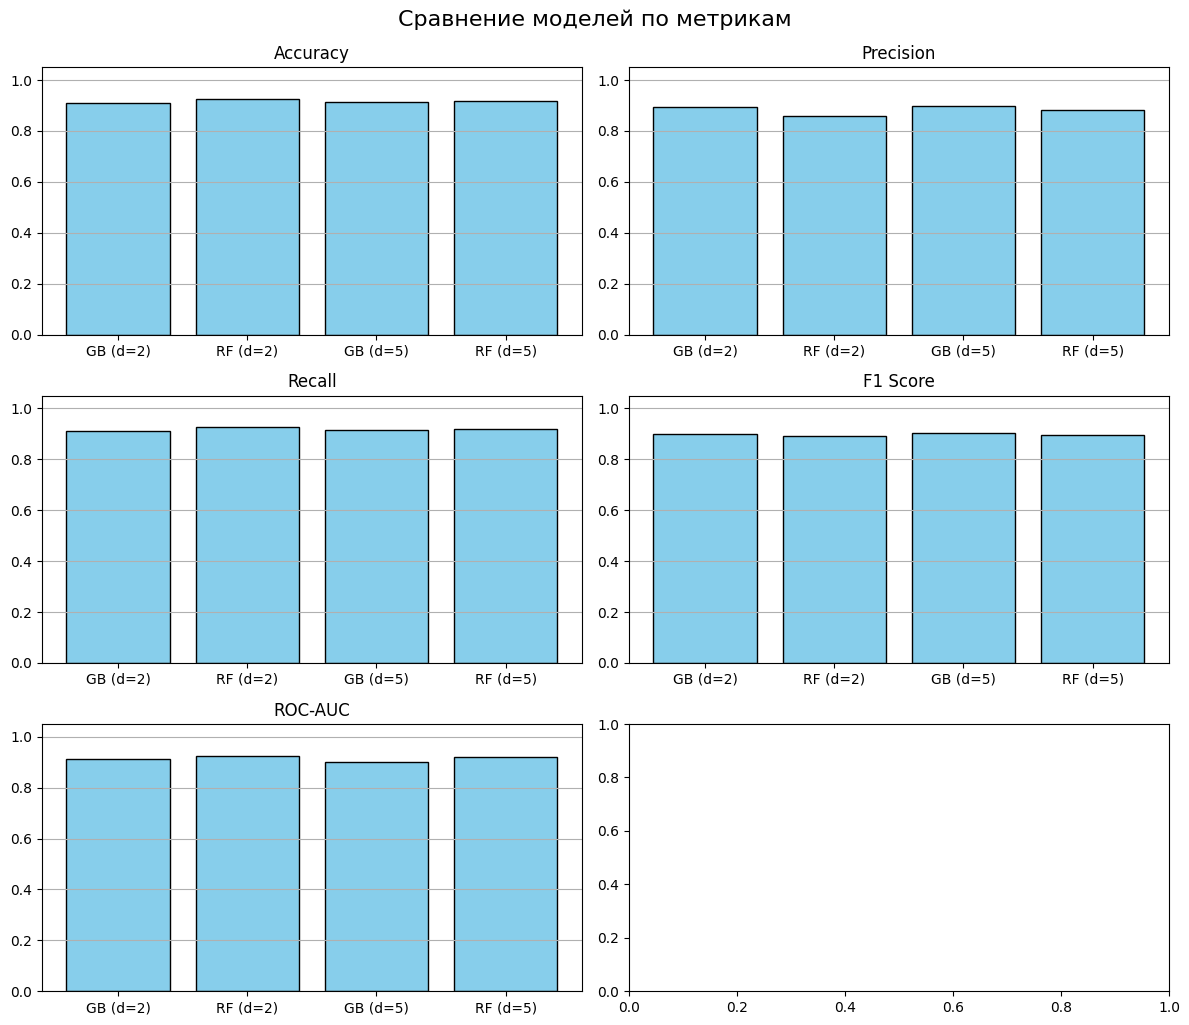

In [19]:
# Данные метрик
models = [
    "GB (d=2)", "RF (d=2)",
    "GB (d=5)", "RF (d=5)"
]

metrics = {
    "Accuracy": [0.9106, 0.9259, 0.9132, 0.9195],
    "Precision": [0.8947, 0.8573, 0.8974, 0.8832],
    "Recall": [0.9106, 0.9259, 0.9132, 0.9195],
    "F1 Score": [0.9002, 0.8903, 0.9037, 0.8952],
    "ROC-AUC": [0.9140, 0.9229, 0.9008, 0.9198],
}

x = np.arange(len(models))  # X координаты групп

fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()

for i, (metric, values) in enumerate(metrics.items()):
    axs[i].bar(x, values, color='skyblue', edgecolor='black')
    axs[i].set_title(metric)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(models)
    axs[i].set_ylim(0, 1.05)
    axs[i].grid(axis='y')

plt.tight_layout()
plt.suptitle("Сравнение моделей по метрикам", fontsize=16, y=1.02)
plt.savefig("../img/z_classifier_comparison.png")
plt.show()
